In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
file_path = r"C:\Users\Likith Reddy\OneDrive\Desktop\updated_ola_bike_ride_forecasting.csv"
data = pd.read_csv(file_path)
# Display the first few rows
data.head()


,Year,Month,Date,Hour,Place,Temperature,Temperature Category,Day Status,Ride Demand
0,2023,3,21,19,Yeshwantpur,26.030448,Moderate Temp (Clear),Working Day,79
1,2024,3,1,6,Jeevanbhima Nagar,11.129214,Low Temp (Rainy),Working Day,21
2,2024,3,1,5,Hebbal,23.627053,Moderate Temp (Clear),Working Day,20
3,2024,10,14,22,Shivajinagar,21.577774,Moderate Temp (Clear),Working Day,75
4,2024,1,14,21,JP Nagar,21.868797,Moderate Temp (Clear),Holiday,137


In [5]:
# Display last few rows
data.tail()

,Year,Month,Date,Hour,Place,Temperature,Temperature Category,Day Status,Ride Demand
49995,2023,8,27,13,Hebbal,28.173692,High Temp (Sunny),Holiday,82
49996,2023,8,14,4,Rajarajeshwari Nagar,20.494605,Moderate Temp (Clear),Working Day,24
49997,2022,6,23,19,Bannerghatta,18.726419,Moderate Temp (Clear),Working Day,75
49998,2022,12,6,4,Seshadripuram,24.965305,Moderate Temp (Clear),Working Day,20
49999,2024,3,27,7,Shivajinagar,24.093308,Moderate Temp (Clear),Working Day,102


In [6]:
data.columns

Index(['Year', 'Month', 'Date', 'Hour', 'Place', 'Temperature',
       'Temperature Category', 'Day Status', 'Ride Demand'],
      dtype='object')

In [7]:
data.shape

(50000, 9)

In [8]:
data.dtypes

Year                      int64
Month                     int64
Date                      int64
Hour                      int64
Place                    object
Temperature             float64
Temperature Category     object
Day Status               object
Ride Demand               int64
dtype: object

In [9]:
data.describe()

,Year,Month,Date,Hour,Temperature,Ride Demand
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,2023.299160,6.513520,14.484160,11.523100,23.036644,70.51430
std,0.780663,3.456486,8.043586,6.920048,6.009793,37.06961
min,2022.000000,1.000000,1.000000,0.000000,-0.813318,20.00000
25%,2023.000000,4.000000,8.000000,6.000000,19.005349,25.00000
50%,2023.000000,7.000000,14.000000,12.000000,23.048215,76.00000
75%,2024.000000,10.000000,21.000000,18.000000,27.094731,100.00000
max,2024.000000,12.000000,28.000000,23.000000,48.540840,171.00000


In [10]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  50000 non-null  int64  
 1   Month                 50000 non-null  int64  
 2   Date                  50000 non-null  int64  
 3   Hour                  50000 non-null  int64  
 4   Place                 50000 non-null  object 
 5   Temperature           50000 non-null  float64
 6   Temperature Category  50000 non-null  object 
 7   Day Status            50000 non-null  object 
 8   Ride Demand           50000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.4+ MB


In [11]:
#DATA PREPROCESSING

# Check for missing values
data.isnull().sum()

Year                    0
Month                   0
Date                    0
Hour                    0
Place                   0
Temperature             0
Temperature Category    0
Day Status              0
Ride Demand             0
dtype: int64

In [12]:
!pip install missingno

<Axes: >

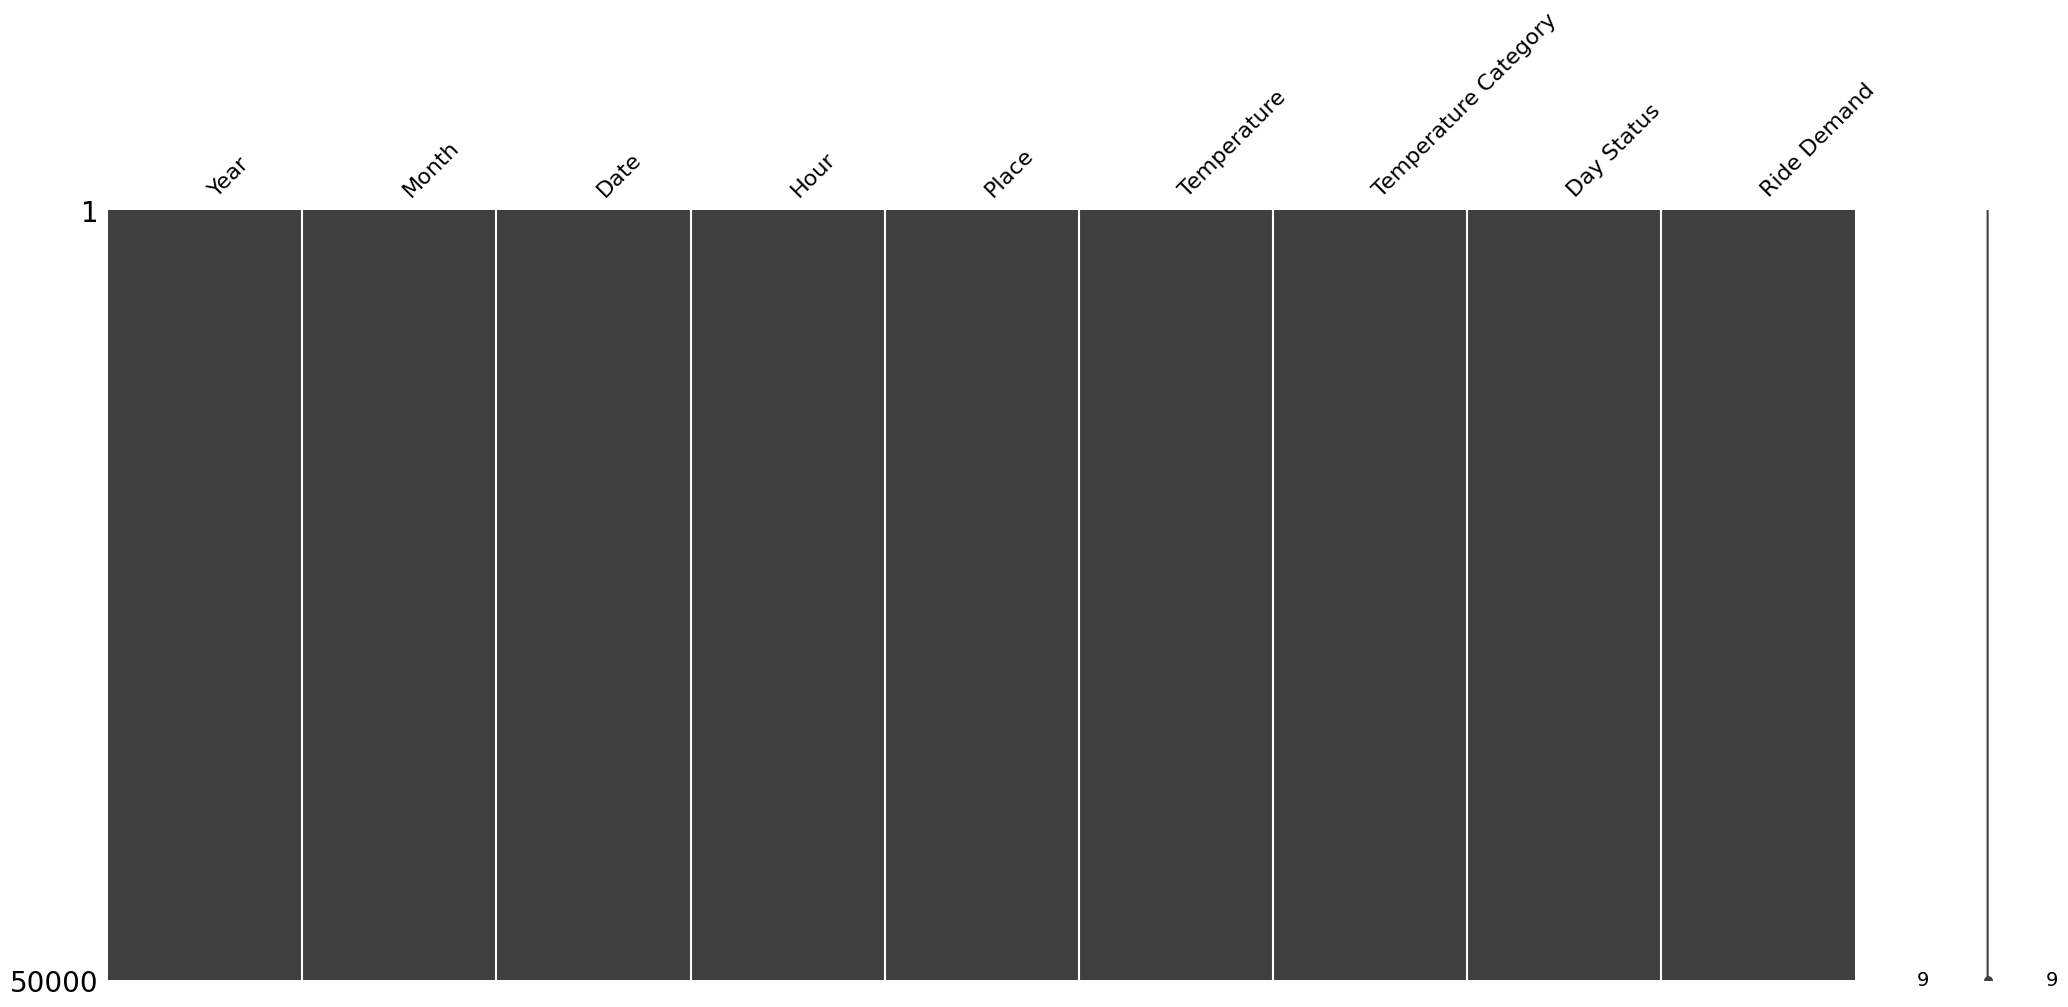

In [13]:
import missingno as mn
mn.matrix(data)

In [14]:
data.drop('Temperature Category',axis=1,inplace=True)

In [15]:
data

,Year,Month,Date,Hour,Place,Temperature,Day Status,Ride Demand
0,2023,3,21,19,Yeshwantpur,26.030448,Working Day,79
1,2024,3,1,6,Jeevanbhima Nagar,11.129214,Working Day,21
2,2024,3,1,5,Hebbal,23.627053,Working Day,20
3,2024,10,14,22,Shivajinagar,21.577774,Working Day,75
4,2024,1,14,21,JP Nagar,21.868797,Holiday,137
...,...,...,...,...,...,...,...,...
49995,2023,8,27,13,Hebbal,28.173692,Holiday,82
49996,2023,8,14,4,Rajarajeshwari Nagar,20.494605,Working Day,24
49997,2022,6,23,19,Bannerghatta,18.726419,Working Day,75
49998,2022,12,6,4,Seshadripuram,24.965305,Working Day,20


In [16]:

# Filling missing values (imputing categorical and numerical separately)

from sklearn.impute import SimpleImputer

# lets Separate numerical and categorical columns
numerical_columns = ['Temperature', 'Ride Demand']
categorical_columns = ['Place','Day Status']

# SimpleImputer is used for numerical columns (replacing missing values with mean strategy)
sc = SimpleImputer(strategy='mean')

# Impute and update the dataframe
data[numerical_columns] = sc.fit_transform(data[numerical_columns])

print("Missing values in numerical columns have been handled.")



# data['Weather'].fillna('Sunny', inplace=True)  # Impute 'Sunny' for Weather
# data['Temp'].fillna(data['Temp'].mean(), inplace=True)  # Impute mean for Temp
# data['Ride_Demand'].fillna(data['Ride_Demand'].median(), inplace=True)  # Median for demand




Missing values in numerical columns have been handled.


In [17]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Initializing LabelEncoder for each categorical column
label_encoders = {}
encoded_data = data[categorical_columns].copy()

# Encoding categorical columns to numeric
for column in categorical_columns:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

# Applying KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(encoded_data), columns=categorical_columns)

# Updating the original dataframe with imputed numeric data
data[categorical_columns] = imputed_data
data['Temperature'] = data['Temperature'].round(0)
data['Ride Demand'] = data['Ride Demand'].round(0)


print("Categorical missing values have been encoded and imputed successfully!")


Categorical missing values have been encoded and imputed successfully!


In [18]:
data

,Year,Month,Date,Hour,Place,Temperature,Day Status,Ride Demand
0,2023,3,21,19,26.0,26.0,1.0,79.0
1,2024,3,1,6,10.0,11.0,1.0,21.0
2,2024,3,1,5,6.0,24.0,1.0,20.0
3,2024,10,14,22,20.0,22.0,1.0,75.0
4,2024,1,14,21,8.0,22.0,0.0,137.0
...,...,...,...,...,...,...,...,...
49995,2023,8,27,13,6.0,28.0,0.0,82.0
49996,2023,8,14,4,17.0,20.0,1.0,24.0
49997,2022,6,23,19,2.0,19.0,1.0,75.0
49998,2022,12,6,4,19.0,25.0,1.0,20.0


In [19]:
print(data.isnull().sum())
print("Missing values are successfully handled in both categorical and numerical columns")

Year           0
Month          0
Date           0
Hour           0
Place          0
Temperature    0
Day Status     0
Ride Demand    0
dtype: int64
Missing values are successfully handled in both categorical and numerical columns


<Axes: >

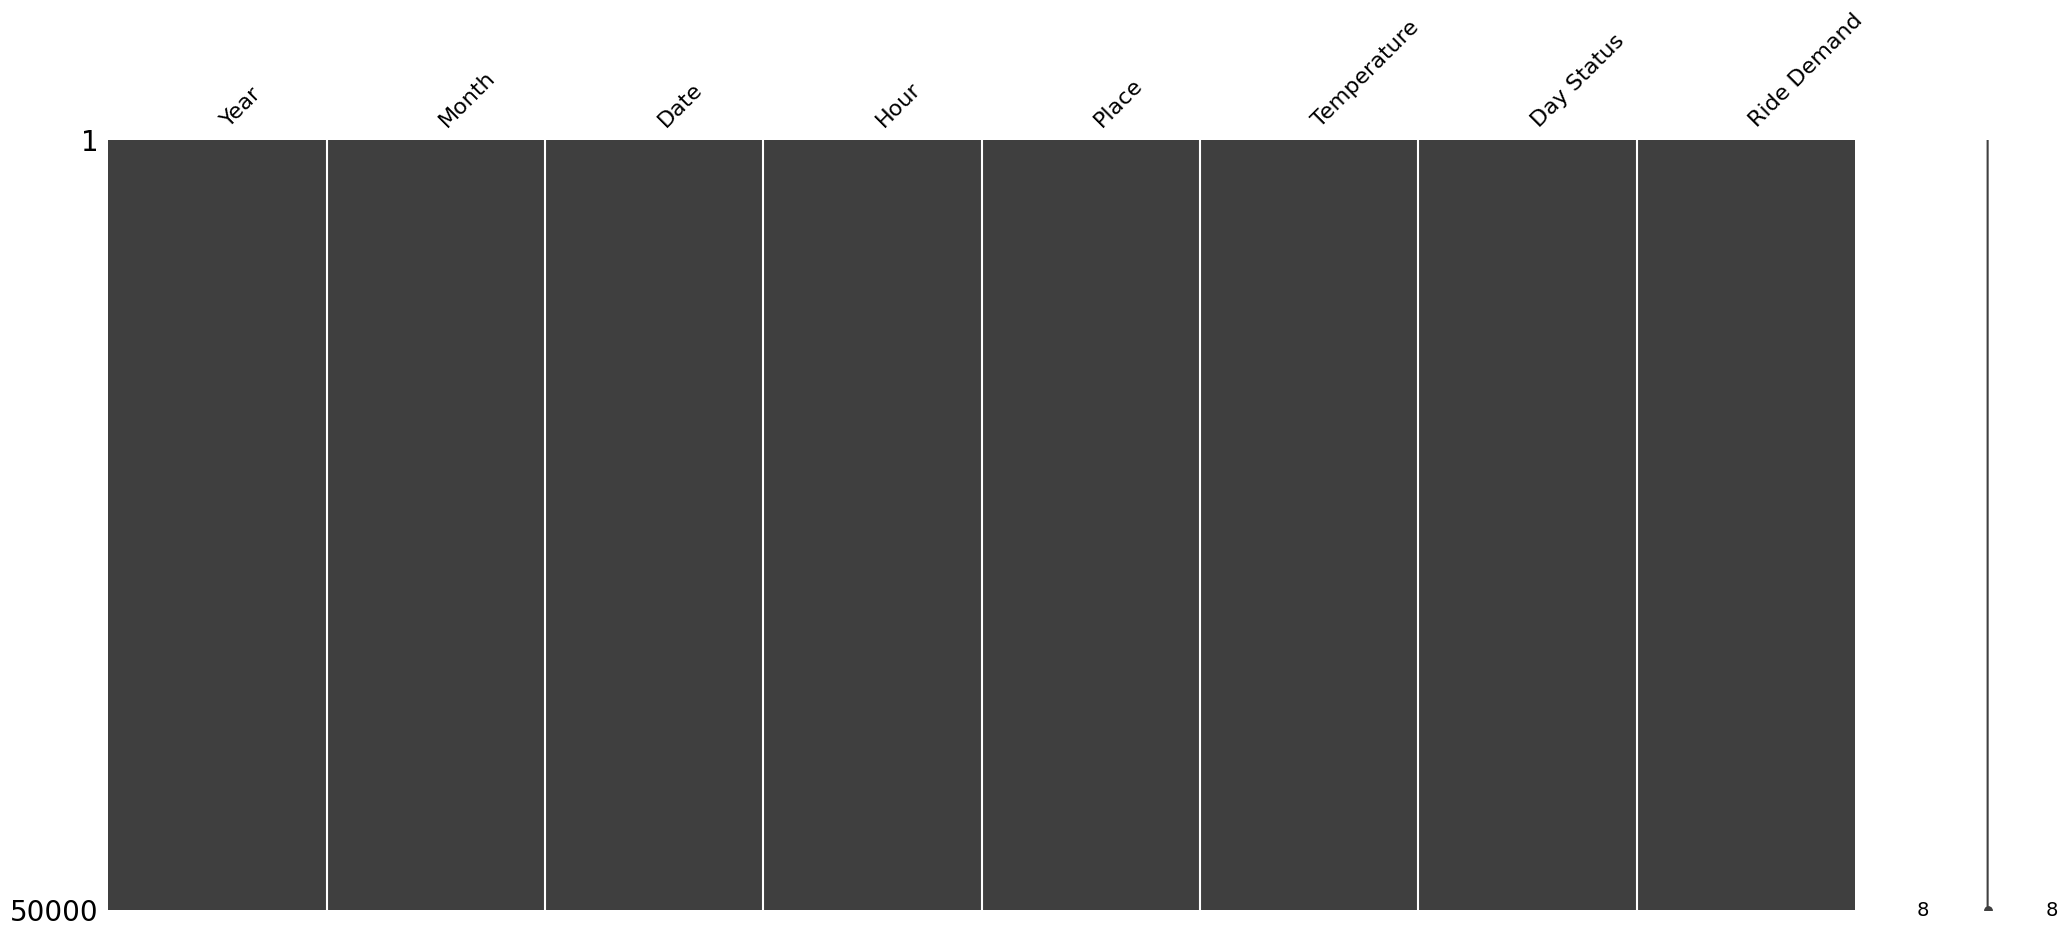

In [20]:
mn.matrix(data)

In [21]:
data.head(10)

,Year,Month,Date,Hour,Place,Temperature,Day Status,Ride Demand
0,2023,3,21,19,26.0,26.0,1.0,79.0
1,2024,3,1,6,10.0,11.0,1.0,21.0
2,2024,3,1,5,6.0,24.0,1.0,20.0
3,2024,10,14,22,20.0,22.0,1.0,75.0
4,2024,1,14,21,8.0,22.0,0.0,137.0
5,2024,5,23,18,1.0,28.0,1.0,96.0
6,2024,4,17,23,13.0,30.0,1.0,54.0
7,2024,5,22,5,3.0,26.0,1.0,21.0
8,2022,8,26,8,15.0,16.0,1.0,34.0
9,2023,7,12,20,22.0,24.0,1.0,128.0


In [22]:
data

,Year,Month,Date,Hour,Place,Temperature,Day Status,Ride Demand
0,2023,3,21,19,26.0,26.0,1.0,79.0
1,2024,3,1,6,10.0,11.0,1.0,21.0
2,2024,3,1,5,6.0,24.0,1.0,20.0
3,2024,10,14,22,20.0,22.0,1.0,75.0
4,2024,1,14,21,8.0,22.0,0.0,137.0
...,...,...,...,...,...,...,...,...
49995,2023,8,27,13,6.0,28.0,0.0,82.0
49996,2023,8,14,4,17.0,20.0,1.0,24.0
49997,2022,6,23,19,2.0,19.0,1.0,75.0
49998,2022,12,6,4,19.0,25.0,1.0,20.0


In [23]:



# Calculate Z-scores for the 'Temperature' column
temperature_mean = data['Temperature'].mean()
temperature_std = data['Temperature'].std()

# Z-score for each value in the 'Temperature' column
data['Z-Score'] = (data['Temperature'] - temperature_mean) / temperature_std

# Detect outliers where absolute Z-score is greater than 3
outliers = data[abs(data['Z-Score']) > 3]

# # Optionally, print or save the outliers to a new file
# outliers.to_csv('/mnt/data/detected_outliers.csv', index=False)

# Display the number of outliers detected
print(f"Number of outliers detected: {len(outliers)}")
print(outliers)


Number of outliers detected: 98
       Year  Month  Date  Hour  Place  Temperature  Day Status  Ride Demand  \
788    2023      1    16    23   12.0          4.0         1.0         51.0   
1367   2024      7     8    23   24.0          4.0         1.0         82.0   
1492   2024      7    12    13   25.0         43.0         1.0         57.0   
1869   2024      5     7     1    7.0         42.0         1.0         24.0   
1978   2024      2     1     6   18.0         42.0         1.0         21.0   
...     ...    ...   ...   ...    ...          ...         ...          ...   
47686  2023      1    18    15   11.0         43.0         1.0         62.0   
48220  2023      2    20     8   13.0          4.0         1.0         74.0   
48640  2023     11     9     4   16.0         44.0         1.0         20.0   
49144  2024      5    16    22   22.0         -1.0         1.0         64.0   
49285  2023      2    19    10   16.0         43.0         0.0         82.0   

        Z-Score  
7

In [24]:
from scipy.stats import zscore

# Assuming 'data' is your DataFrame and 'Temperature' is the column with outliers

# Calculate Z-scores for the 'Temperature' column
data['Temperature_ZScore'] = zscore(data['Temperature'])

# Define the Z-score threshold for outliers (usually 3 or -3)
threshold = 3

# Find outliers (absolute Z-score greater than the threshold)
outliers = np.abs(data['Temperature_ZScore']) > threshold

# Impute the outliers with the median value of the column (you can also use mean, or another method)
imputed_value = data['Temperature'].mean()

# Replace the outliers in 'Temperature' with the imputed value
data.loc[outliers, 'Temperature'] = imputed_value

# Drop the Z-score column as it's no longer needed
data = data.drop(columns=['Temperature_ZScore'])

# Display the updated data
print(f"Imputed dataset size: {len(data)}")

# Optionally, save the imputed data to a CSV file
# data.to_csv('imputed_data.csv', index=False)


Imputed dataset size: 50000


In [25]:
# Calculate Z-scores for the 'Ride Demand' column
data['RideDemand_ZScore'] = zscore(data['Ride Demand'])

# Define Z-score threshold for outliers (usually 3 or -3)
threshold = 3

# Find outliers in 'Ride Demand' column
outliers_ride_demand = np.abs(data['RideDemand_ZScore']) > threshold

# Impute outliers with the median or mean (or handle according to your strategy)
imputed_value_ride_demand = data['Ride Demand'].mean()  # You can also use mean

# Replace the outliers with the imputed value
data.loc[outliers_ride_demand, 'Ride Demand'] = imputed_value_ride_demand

# Drop the Z-score column as it's no longer needed
data = data.drop(columns=['RideDemand_ZScore'])

# Display the updated data (optional)
print(f"Updated dataset with imputed ride demand. New size: {len(data)}")

# Optionally, save the updated data to a new CSV file
# data.to_csv('updated_data.csv', index=False)

# Show a brief summary of the 'Ride Demand' column after imputation
print(data['Ride Demand'].describe())


Updated dataset with imputed ride demand. New size: 50000
count    50000.00000
mean        70.51430
std         37.06961
min         20.00000
25%         25.00000
50%         76.00000
75%        100.00000
max        171.00000
Name: Ride Demand, dtype: float64


Average ride demand per year:
Year
2022    60.929658
2023    68.544108
2024    75.541880
Name: Ride Demand, dtype: float64


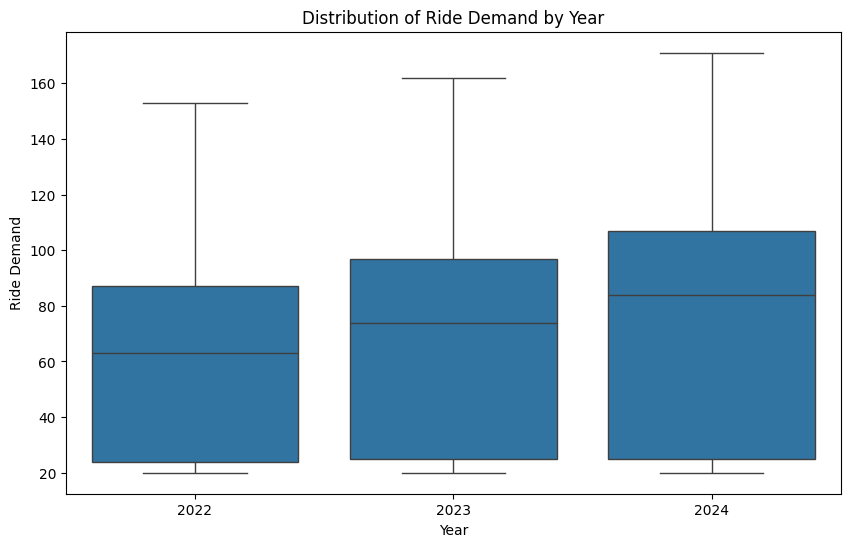

T-statistic: -17.961006691765935, P-value: 7.546455060822825e-72
There is a significant difference in ride demand between the years.


In [26]:
from scipy.stats import ttest_ind

# To Ensure 'Year' and 'Ride_Demand' columns are numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Ride Demand'] = pd.to_numeric(data['Ride Demand'], errors='coerce')

# Group by year and calculate average demand
yearly_demand = data.groupby('Year')['Ride Demand'].mean()
print("Average ride demand per year:")
print(yearly_demand)

# Plot ride demand distribution by year
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Year', y='Ride Demand')
plt.title('Distribution of Ride Demand by Year')
plt.xlabel('Year')
plt.ylabel('Ride Demand')
plt.show()

# Statistical significance test (t-test) between years
year_2023_demand = data[data['Year'] == 2022]['Ride Demand']
year_2023_demand = data[data['Year'] == 2023]['Ride Demand']
year_2024_demand = data[data['Year'] == 2024]['Ride Demand']

t_stat, p_value = ttest_ind(year_2023_demand.dropna(), year_2024_demand.dropna())
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in ride demand between the years.")
else:
    print("There is no significant difference in ride demand between the years.")


In [27]:
# # Adding a trend column
# data['trend'] = data['Year'] - 2022  # Create trend column
# data1.drop('Year', axis=1, inplace=True)  # Drop the year column

# # Re-evaluate correlation
# correlation = data1['trend'].corr(data1['Ride_Demand'])
# print(f"Correlation between Trend and Ride Demand: {correlation}")


In [28]:
data

,Year,Month,Date,Hour,Place,Temperature,Day Status,Ride Demand,Z-Score
0,2023,3,21,19,26.0,26.0,1.0,79.0,0.492387
1,2024,3,1,6,10.0,11.0,1.0,21.0,-2.001199
2,2024,3,1,5,6.0,24.0,1.0,20.0,0.159909
3,2024,10,14,22,20.0,22.0,1.0,75.0,-0.172569
4,2024,1,14,21,8.0,22.0,0.0,137.0,-0.172569
...,...,...,...,...,...,...,...,...,...
49995,2023,8,27,13,6.0,28.0,0.0,82.0,0.824865
49996,2023,8,14,4,17.0,20.0,1.0,24.0,-0.505048
49997,2022,6,23,19,2.0,19.0,1.0,75.0,-0.671287
49998,2022,12,6,4,19.0,25.0,1.0,20.0,0.326148


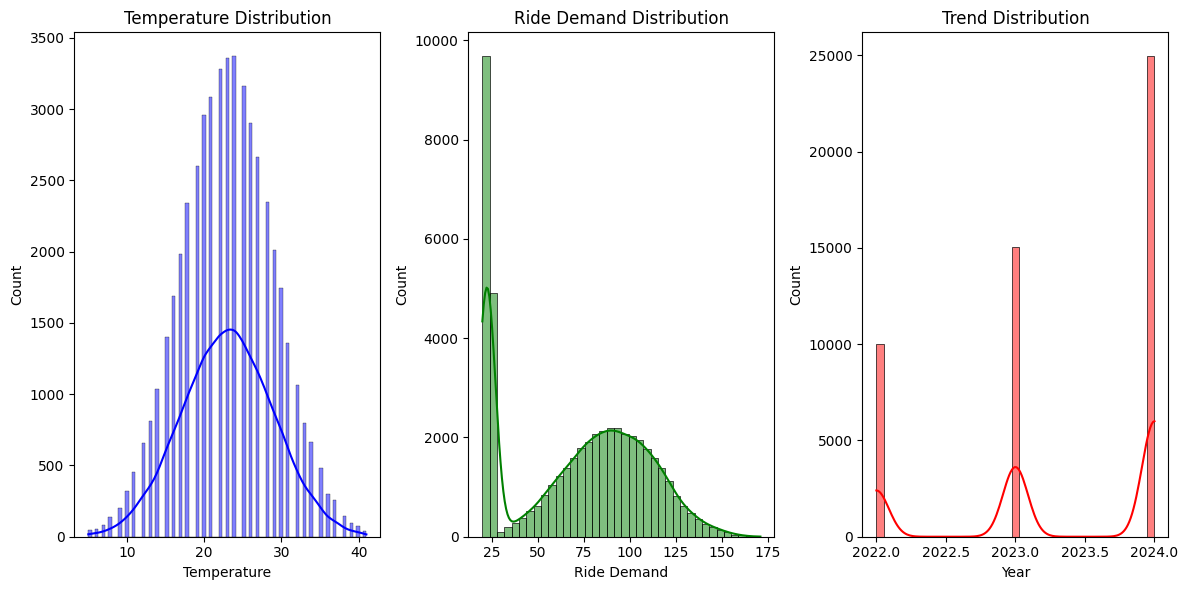

In [29]:
# EXPLORATORY DATA ANALYSIS (EDA)

# Plot histograms for numerical columns
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(data['Temperature'], kde=True, color='blue')
plt.title('Temperature Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Ride Demand'], kde=True, color='green')
plt.title('Ride Demand Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Year'], kde=True, color='red')
plt.title('Trend Distribution')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Hour Distribution')

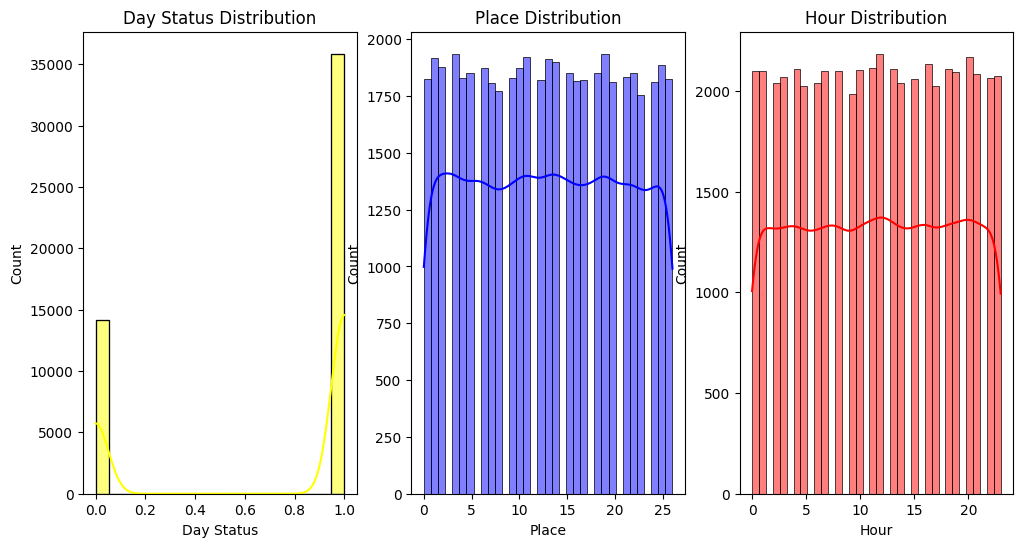

In [30]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(data['Day Status'], kde=True, color='yellow')
plt.title('Day Status Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Place'], kde=True, color='blue')
plt.title('Place Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Hour'], kde=True, color='red')
plt.title('Hour Distribution')

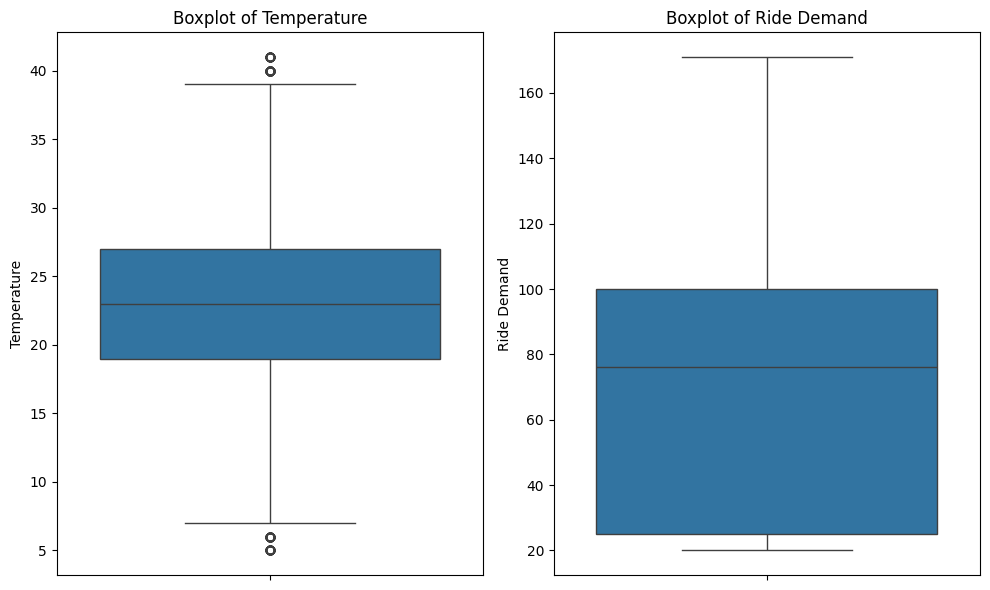

In [31]:
# EXPLORATORY DATA ANALYSIS (EDA)

# Outlier Detection (Visualizing using Boxplot for numerical columns)
numerical_columns1 = ['Temperature', 'Ride Demand']
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_columns1):
    plt.subplot(1, len(numerical_columns1), i+1)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

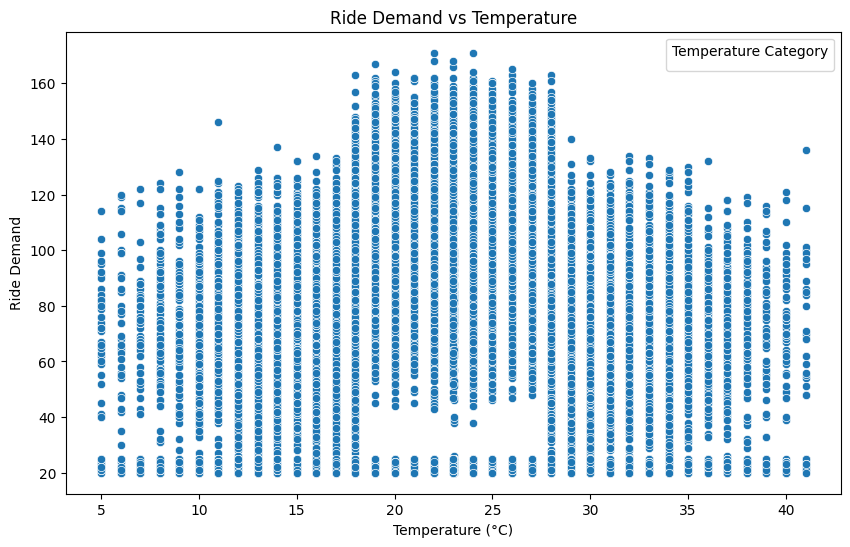

In [32]:
# Ride Demand vs Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Temperature'], y=data['Ride Demand'], palette='coolwarm')
plt.title('Ride Demand vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ride Demand')
plt.legend(title="Temperature Category")
plt.show()


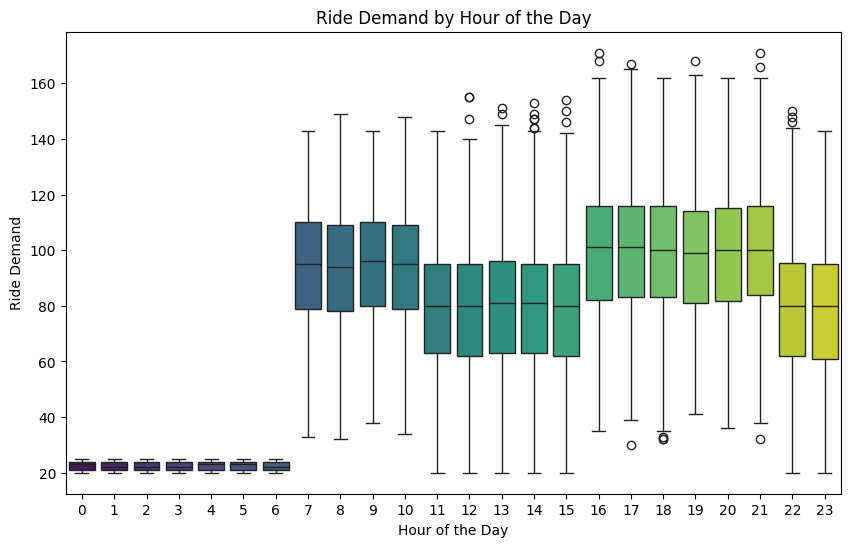

In [33]:
# Ride Demand by Hour of the Day
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='Ride Demand', data=data, palette='viridis')
plt.title('Ride Demand by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Ride Demand')
plt.show()

<Axes: >

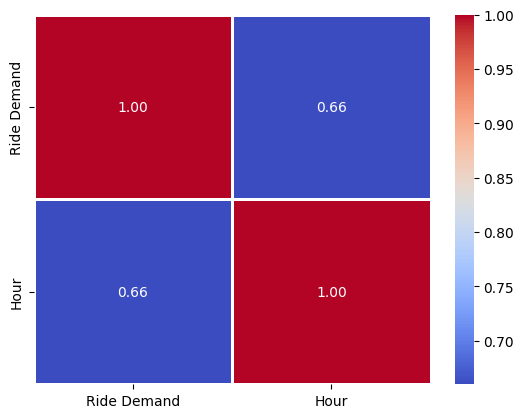

In [34]:
correlation_matrix = data[['Ride Demand', 'Hour']].corr()  # Correlation matrix for numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)

<Axes: >

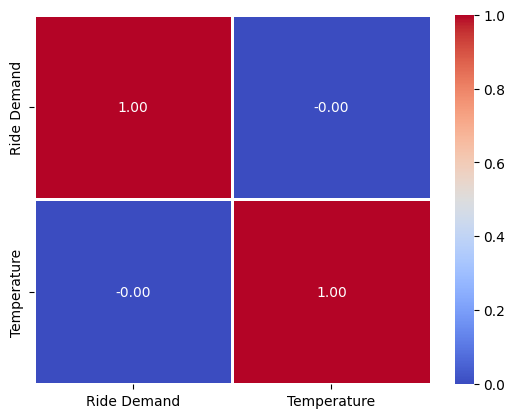

In [35]:
correlation_matrix = data[['Ride Demand', 'Temperature']].corr()  # Correlation matrix for numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)



<Axes: >

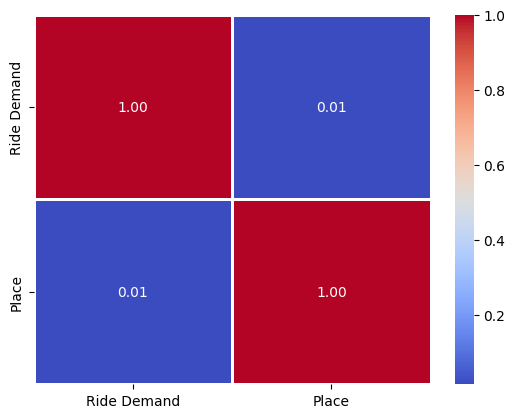

In [36]:
correlation_matrix = data[['Ride Demand', 'Place']].corr()  # Correlation matrix for numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)



<Axes: >

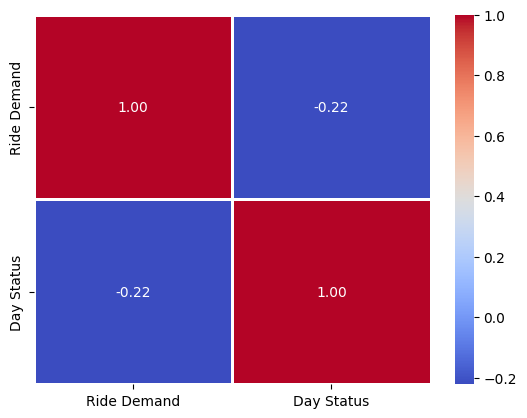

In [37]:
correlation_matrix = data[['Ride Demand', 'Day Status']].corr()  # Correlation matrix for numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)



In [38]:
!pip install xgboost


In [39]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = data.drop(columns=['Ride Demand'])
y = data['Ride Demand']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Verify the split
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (42500, 8)
Testing data shape: (7500, 8)


In [40]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold



# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# boosting_type='gbdt',
#     num_leaves=50,
#     max_depth=6,
#     learning_rate=0.01,
#     n_estimators=1000,
#     subsample=0.7,
#     colsample_bytree=0.7,
#     reg_alpha=1.0,
#     reg_lambda=1.0,
#     min_child_samples=30,
#     min_split_gain=0.2,
#     random_state=42

# num_leaves= 130, n_estimators= 350, max_depth= 4, learning_rate= 0.05

#learning_rate= 0.1, max_depth= 3, min_child_samples= 10, n_estimators= 200, num_leaves= 20

# --- Lightgbm Regressor ---
# Initialize the LightGBM Regressor
#random_state=42, n_estimators=100, learning_rate=0.1, max_depth=-1
lgb_model = lgb.LGBMRegressor(num_leaves= 13, max_depth=19, learning_rate= 0.026521071030766414, feature_fraction=0.9584278964591215, bagging_fraction=0.7977702611966214, lambda_l1= 0.0012075686267437236, lambda_l2= 0.004632712739896852, n_estimators= 586)

# Train the model
lgb_model.fit(X_train, y_train)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Make predictions
y_pred_lgb = lgb_model.predict(X_test)



# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred_lgb)
mse = mean_squared_error(y_test, y_pred_lgb)
r2 = r2_score(y_test, y_pred_lgb)

# Adjusted R² Calculation
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print metrics
print("LightGBM Regressor Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2:.4f}")
print("-" * 40)

# n_estimators=50,objective='reg:squarederror', random_state=42,max_depth= 3
# --- XGBoost Regressor ---
# xgboost_model = xgb.XGBRegressor(n_estimators=50,objective='reg:squarederror', random_state=42,max_depth= 3)
# xgboost_model.fit(X_train, y_train)
# y_pred_xgb = xgboost_model.predict(X_test)
# xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
# xgb_mse = mean_squared_error(y_test, y_pred_xgb)
# xgb_r2 = r2_score(y_test, y_pred_xgb)

# print("XGBoost Regressor Performance:")
# print(f"  Mean Absolute Error (MAE): {xgb_mae:.4f}")
# print(f"  Mean Squared Error (MSE): {xgb_mse:.4f}")
# print(f"  R-squared (R2): {xgb_r2:.4f}")
# print("-" * 40)

# # --- Random Forest Regressor ---
# random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
# random_forest_model.fit(X_train, y_train)
# y_pred_rf = random_forest_model.predict(X_test)
# rf_mae = mean_absolute_error(y_test, y_pred_rf)
# rf_mse = mean_squared_error(y_test, y_pred_rf)
# rf_r2 = r2_score(y_test, y_pred_rf)

# print("Random Forest Regressor Performance:")
# print(f"  Mean Absolute Error (MAE): {rf_mae:.4f}")
# print(f"  Mean Squared Error (MSE): {rf_mse:.4f}")
# print(f"  R-squared (R2): {rf_r2:.4f}")
# print("-" * 40)
# # --- Ada boost Regressor ---

# # Initialize AdaBoost Regressor
# ada_model = AdaBoostRegressor(random_state=42, n_estimators=100)

# # Train the model
# ada_model.fit(X_train, y_train)

# # Make predictions
# y_pred_ada = ada_model.predict(X_test)

# # Calculate performance metrics
# mae = mean_absolute_error(y_test, y_pred_ada)
# mse = mean_squared_error(y_test, y_pred_ada)
# r2 = r2_score(y_test, y_pred_ada)

# # Calculate Adjusted R²
# n = len(X_test)  # Total number of test samples
# k = X_test.shape[1]  # Total number of features
# adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# # Display metrics
# print("AdaBoost Regressor Performance Metrics:")
# print(f"  Mean Absolute Error (MAE): {mae:.4f}")
# print(f"  Mean Squared Error (MSE): {mse:.4f}")
# print(f"  R-squared (R²): {r2:.4f}")
# print(f"  Adjusted R-squared: {adjusted_r2:.4f}")
# print("-" * 40)

# # --- Decision Tree Regressor ---
# decision_tree_model = DecisionTreeRegressor(random_state=42)
# decision_tree_model.fit(X_train, y_train)
# y_pred_dt = decision_tree_model.predict(X_test)
# dt_mae = mean_absolute_error(y_test, y_pred_dt)
# dt_mse = mean_squared_error(y_test, y_pred_dt)
# dt_r2 = r2_score(y_test, y_pred_dt)

# print("Decision Tree Regressor Performance:")
# print(f"  Mean Absolute Error (MAE): {dt_mae:.4f}")
# print(f"  Mean Squared Error (MSE): {dt_mse:.4f}")
# print(f"  R-squared (R2): {dt_r2:.4f}")
# print("-" * 40)

# # --- Support Vector Regressor (SVR) ---
# svr_model = SVR(kernel='rbf')
# svr_model.fit(X_train, y_train)
# y_pred_svr = svr_model.predict(X_test)
# svr_mae = mean_absolute_error(y_test, y_pred_svr)
# svr_mse = mean_squared_error(y_test, y_pred_svr)
# svr_r2 = r2_score(y_test, y_pred_svr)

# print("Support Vector Regressor (SVR) Performance:")
# print(f"  Mean Absolute Error (MAE): {svr_mae:.4f}")
# print(f"  Mean Squared Error (MSE): {svr_mse:.4f}")
# print(f"  R-squared (R2): {svr_r2:.4f}")
# print("-" * 40)




[LightGBM] [Warning] feature_fraction is set=0.9584278964591215, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9584278964591215
[LightGBM] [Warning] lambda_l1 is set=0.0012075686267437236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012075686267437236
[LightGBM] [Warning] lambda_l2 is set=0.004632712739896852, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004632712739896852
[LightGBM] [Warning] bagging_fraction is set=0.7977702611966214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7977702611966214
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9584278964591215, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9584278964591215
[LightGBM] [Warning] lambda_l1 is set=0.0012075686267437236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012075686267437236
[LightGBM] [Warning] lambda_l2 is set=0.004632712

In [41]:
# from sklearn.model_selection import GridSearchCV
# from lightgbm import LGBMRegressor


# # Initialize LightGBM Regressor
# lgbm = LGBMRegressor(random_state=42)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [20, 31, 50],
#     'min_child_samples': [10, 20, 30]
# }

# # Perform Grid Search
# grid_search = GridSearchCV(
#     estimator=lgbm,
#     param_grid=param_grid,
#     scoring='r2',  # Metric to optimize
#     cv=3,          # 3-fold cross-validation
#     verbose=1,
#     n_jobs=-1      # Use all available CPUs
# )

# grid_search.fit(X_train, y_train)

# # Print the best parameters and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best R2 Score:", grid_search.best_score_)

# # Evaluate the best model on test data
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Test MAE: {mae:.4f}")
# print(f"Test MSE: {mse:.4f}")
# print(f"Test R2: {r2:.4f}")


In [42]:
# from sklearn.model_selection import RandomizedSearchCV
# import lightgbm as lgb
# import numpy as np

# # Define the parameter distributions for LightGBM
# param_dist = {
#     'num_leaves': np.arange(20, 150, step=10),
#     'max_depth': np.arange(-1, 30, step=5),
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'n_estimators': np.arange(50, 500, step=50)
# }

# # Initialize the model
# lgb_model = lgb.LGBMRegressor()

# # Set up RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=lgb_model,
#     param_distributions=param_dist,
#     n_iter=50,  # Number of random combinations to try
#     scoring='neg_mean_squared_error',
#     cv=5,
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# # Fit the model
# random_search.fit(X_train, y_train)

# # Get the best parameters
# print("Best parameters found by RandomizedSearchCV:", random_search.best_params_)


In [43]:
# !pip install optuna --upgrade

In [44]:
# import optuna
# import lightgbm as lgb
# from sklearn.metrics import mean_squared_error
# import optuna.visualization as viz

# def objective(trial):
#     # Define the parameter search space
#     params = {
#         'objective': 'regression',
#         'metric': 'rmse',
#         'boosting_type': 'gbdt',
#         'num_leaves': trial.suggest_int('num_leaves', 10, 200),
#         'max_depth': trial.suggest_int('max_depth', -1, 50),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.3),
#         'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
#         'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
#         'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
#         'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
#         'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
#     }

#     # Create and train the model
#     lgb_model = lgb.LGBMRegressor(**params)
#     lgb_model.fit(X_train, y_train)

#     # Make predictions
#     y_pred = lgb_model.predict(X_test)

#     # Calculate RMSE as the optimization objective
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     return rmse

# # Run the optimization
# study = optuna.create_study(direction='minimize') #study is defined here
# study.optimize(objective, n_trials=200)

# # Correctly access the best parameters and best score
# print("Best parameters found by Optuna:", study.best_params)
# print("Best RMSE achieved:", study.best_value)

# # Moved visualization after study definition and optimization
# viz.plot_parallel_coordinate(study) # Now study is defined before this line
# viz.plot_param_importances(study) # and this line

In [45]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# import xgboost as xgb
# import lightgbm as lgb


# # Split data into training and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the models
# models = {
#     'Lightgbm Regressor': lgb.LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=-1),
#     'XGBoost Regressor': xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
#     'Random Forest Regressor': RandomForestRegressor(random_state=42),
#     'Adaboost Regressor': AdaBoostRegressor(random_state=42),
#     'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
#     'Support Vector Regressor (SVR)': SVR(kernel='rbf')

# }

# # Collect performance metrics for each model
# results = []

# # Total samples and number of predictors for Adjusted R²
# n = len(X_test)  # Total number of test samples
# k = X_test.shape[1]  # Total number of features

# for model_name, model in models.items():
#     # Train the model
#     model.fit(X_train, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test)

#     # Calculate performance metrics
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     # Calculate Adjusted R²
#     adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

#     # Append results for OLS table
#     results.append({
#         'Model': model_name,
#         'MAE': mae,
#         'MSE': mse,
#         'R2': r2,
#         'Adjusted R2': adjusted_r2
#     })

# # Create a DataFrame to display the results
# ols_table = pd.DataFrame(results)

# # Print the results
# print(ols_table)


In [46]:
# !pip install lightgbm


In [47]:
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Features (X) and Target (y)
# # Replace 'Ride Demand' with your actual target column
# X = data.drop(columns=['Ride Demand'])
# y = data['Ride Demand']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the LightGBM Regressor
# lgb_model = lgb.LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=-1)

# # Train the model
# lgb_model.fit(X_train, y_train)

# # Make predictions
# y_pred_lgb = lgb_model.predict(X_test)

# # Calculate performance metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Adjusted R² Calculation
# n = X_test.shape[0]  # Number of samples
# p = X_test.shape[1]  # Number of features
# adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# # Print metrics
# print("LightGBM Regressor Performance Metrics:")
# print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"Mean Squared Error (MSE): {mse:.4f}")
# print(f"R-squared (R²): {r2:.4f}")
# print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2:.4f}")


In [48]:
print(f"Target Range: {y_test.min()} to {y_test.max()}")


Target Range: 20.0 to 171.0


In [49]:
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 9.46


In [50]:
y_pred_lgb

array([ 22.39964678,  22.78684777,  78.99018042, ..., 139.41818722,
       109.43053744,  88.22061594])

In [51]:
y_test


33553     22.0
9427      20.0
199       92.0
12447     23.0
39489     22.0
         ...  
28567     71.0
25079     20.0
18707    139.0
15200    106.0
5857      81.0
Name: Ride Demand, Length: 10000, dtype: float64

In [52]:
import pandas as pd
import lightgbm as lgb

# Example: Trained LightGBM model (replace with your actual model)
# lgb_model = lgb.LGBMRegressor()
# lgb_model.fit(X_train, y_train)

# Single row input data (replace with actual values for the attributes)
single_row_data = {
    'Year': [2024],  # Example: year 2023
    'Month': [1],   # Example: November
    'Date': [14],    # Example: 29th day of the month
    'Hour': [21],    # Example: 3 PM
    'Place': [8],    # Example: 5th place (assuming it's a numerical encoding of places)
    'Temperature': [22],  # Example: Temperature in Celsius
    'Temperature Category': [2],  # Example: Category (possibly a coded value, e.g., 1: High, 2: Medium, 3: Low)
    'Day Status': [0],  # Example: Day Status (coded: 1 = working day, 0 = weekend, etc.)
}

# Convert the dictionary into a DataFrame (same structure as training data)
single_row_df = pd.DataFrame(single_row_data)

# Ensure that the columns match the feature set used during model training (no 'Ride Demand')
X_single_row = single_row_df  # No need to drop anything if 'Ride Demand' is not included in input data

# Predict using the trained model
y_pred_single_row = lgb_model.predict(X_single_row)

# Output the prediction
print(f"Predicted Ride Demand for the given input: {y_pred_single_row[0]}")


[LightGBM] [Warning] feature_fraction is set=0.9584278964591215, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9584278964591215
[LightGBM] [Warning] lambda_l1 is set=0.0012075686267437236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012075686267437236
[LightGBM] [Warning] lambda_l2 is set=0.004632712739896852, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004632712739896852
[LightGBM] [Warning] bagging_fraction is set=0.7977702611966214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7977702611966214
Predicted Ride Demand for the given input: 109.03337069001928


In [53]:
data

,Year,Month,Date,Hour,Place,Temperature,Day Status,Ride Demand,Z-Score
0,2023,3,21,19,26.0,26.0,1.0,79.0,0.492387
1,2024,3,1,6,10.0,11.0,1.0,21.0,-2.001199
2,2024,3,1,5,6.0,24.0,1.0,20.0,0.159909
3,2024,10,14,22,20.0,22.0,1.0,75.0,-0.172569
4,2024,1,14,21,8.0,22.0,0.0,137.0,-0.172569
...,...,...,...,...,...,...,...,...,...
49995,2023,8,27,13,6.0,28.0,0.0,82.0,0.824865
49996,2023,8,14,4,17.0,20.0,1.0,24.0,-0.505048
49997,2022,6,23,19,2.0,19.0,1.0,75.0,-0.671287
49998,2022,12,6,4,19.0,25.0,1.0,20.0,0.326148


In [54]:
import joblib




# Save the trained model
# joblib.dump(lgb_model, 'lgb_model.pkl')
joblib.dump(lgb_model, r'C:\Users\Likith Reddy\OneDrive\Desktop\projectola\lgb_model.pkl')





['C:\\Users\\Likith Reddy\\OneDrive\\Desktop\\projectola\\lgb_model.pkl']

In [55]:
# Load the model
loaded_model = joblib.load('lgb_model.pkl')

# Use the loaded model for predictions
y_pred = loaded_model.predict(X_test)
